<a href="https://colab.research.google.com/github/rsnbgt/DSA/blob/main/carPricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [140]:
import tensorflow as tf
import pandas as pd
import seaborn as sns
import numpy as np
from tensorflow.keras.layers import Normalization,Dense,InputLayer
from tensorflow.keras.losses import MeanSquaredError,Huber,MeanAbsoluteError
from tensorflow.keras.metrics import RootMeanSquaredError
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam

**Data** **Preparation**

In [115]:
data = pd.read_csv("train.csv",sep=",")
data.head()

v.id  on road old  on road now  years      km  rating  condition  economy  \
0     1       535651       798186      3   78945       1          2       14   
1     2       591911       861056      6  117220       5          9        9   
2     3       686990       770762      2  132538       2          8       15   
3     4       573999       722381      4  101065       4          3       11   
4     5       691388       811335      6   61559       3          9       12   

   top speed  hp  torque  current price  
0        177  73     123       351318.0  
1        148  74      95       285001.5  
2        181  53      97       215386.0  
3        197  54     116       244295.5  
4        160  53     105       531114.5

In [116]:
data.shape

(1000, 12)

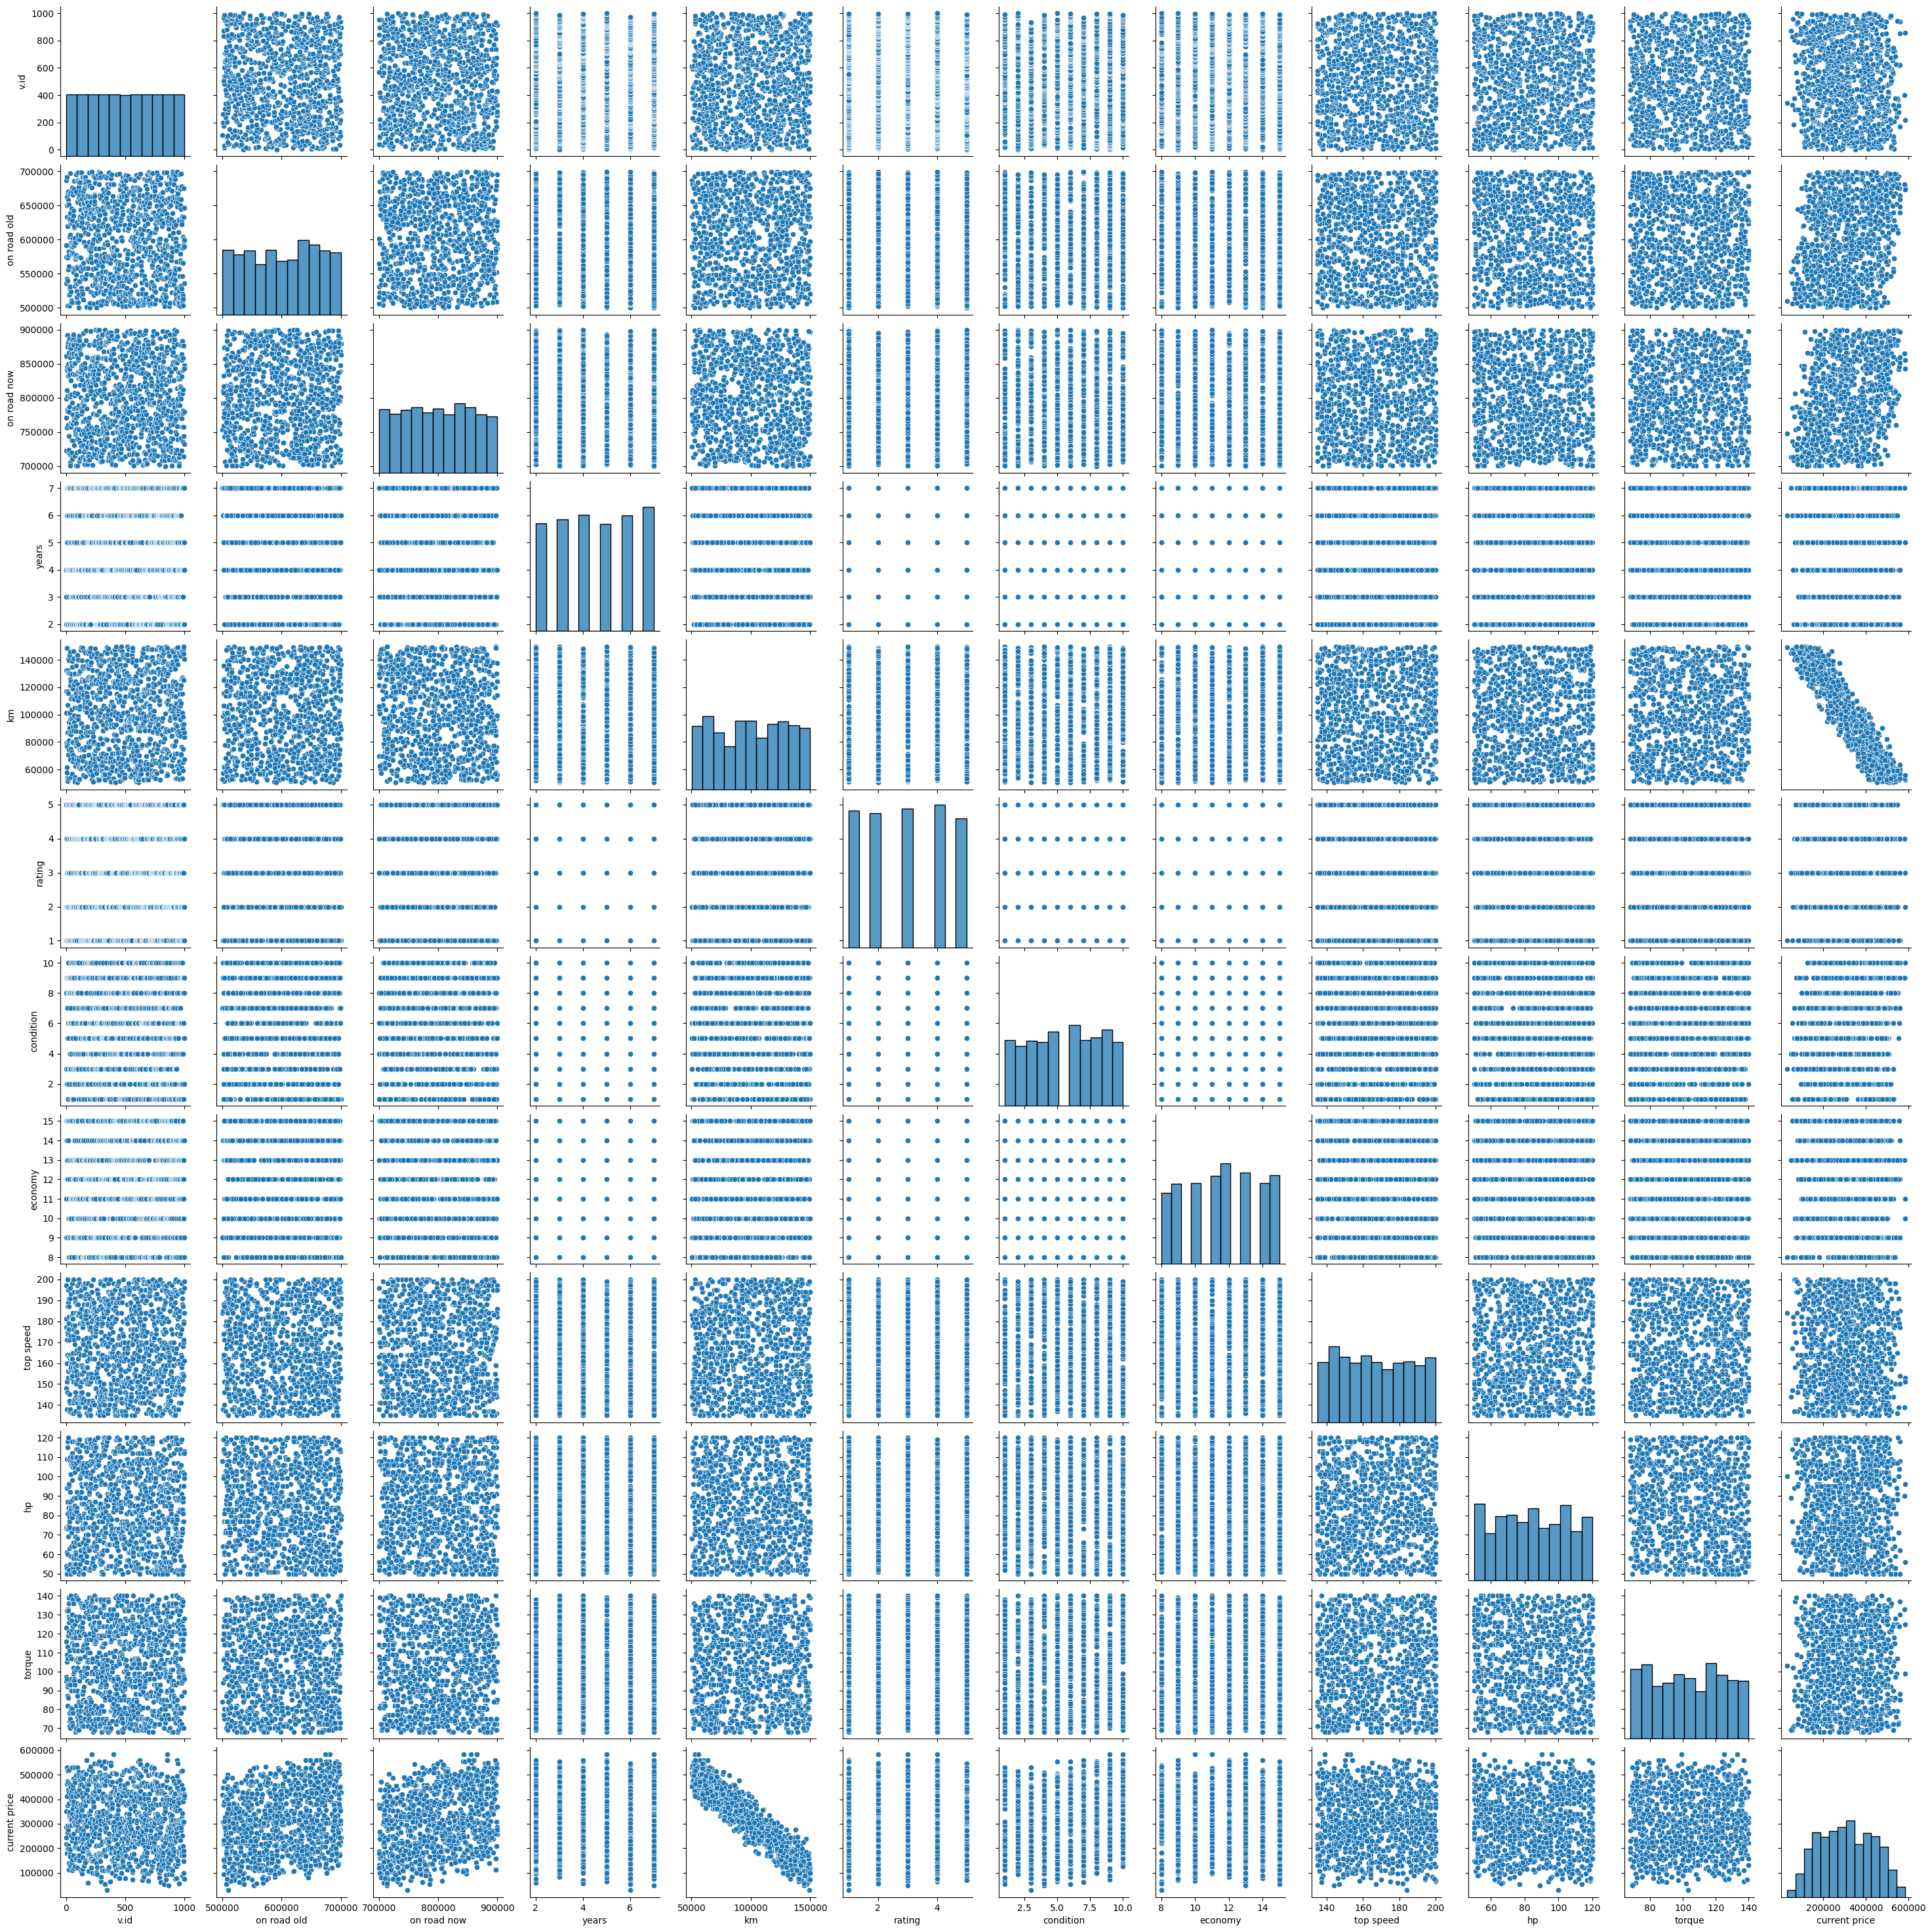

In [117]:
sns.pairplot(data)

In [118]:
tensor_data=tf.constant(data)
tensor_data=tf.cast(tensor_data,tf.float32)
data.head()

v.id  on road old  on road now  years      km  rating  condition  economy  \
0     1       535651       798186      3   78945       1          2       14   
1     2       591911       861056      6  117220       5          9        9   
2     3       686990       770762      2  132538       2          8       15   
3     4       573999       722381      4  101065       4          3       11   
4     5       691388       811335      6   61559       3          9       12   

   top speed  hp  torque  current price  
0        177  73     123       351318.0  
1        148  74      95       285001.5  
2        181  53      97       215386.0  
3        197  54     116       244295.5  
4        160  53     105       531114.5

In [119]:
tensor_data=tf.random.shuffle(tensor_data)
data.head()

v.id  on road old  on road now  years      km  rating  condition  economy  \
0     1       535651       798186      3   78945       1          2       14   
1     2       591911       861056      6  117220       5          9        9   
2     3       686990       770762      2  132538       2          8       15   
3     4       573999       722381      4  101065       4          3       11   
4     5       691388       811335      6   61559       3          9       12   

   top speed  hp  torque  current price  
0        177  73     123       351318.0  
1        148  74      95       285001.5  
2        181  53      97       215386.0  
3        197  54     116       244295.5  
4        160  53     105       531114.5

In [120]:
x=tensor_data[:,3 : -1]
print(x[:5])

tf.Tensor(
[[4.00000e+00 1.38261e+05 2.00000e+00 9.00000e+00 1.00000e+01 1.69000e+02
  1.19000e+02 1.04000e+02]
 [2.00000e+00 1.33843e+05 3.00000e+00 5.00000e+00 1.30000e+01 1.41000e+02
  8.40000e+01 1.29000e+02]
 [2.00000e+00 6.57060e+04 4.00000e+00 1.00000e+01 8.00000e+00 1.48000e+02
  8.40000e+01 7.50000e+01]
 [5.00000e+00 9.91140e+04 3.00000e+00 2.00000e+00 1.40000e+01 1.89000e+02
  1.20000e+02 8.60000e+01]
 [7.00000e+00 9.25670e+04 3.00000e+00 8.00000e+00 1.20000e+01 1.91000e+02
  8.30000e+01 1.01000e+02]], shape=(5, 8), dtype=float32)


In [121]:
y=tensor_data[:,-1]
y=tf.expand_dims(y,axis=1)
print(y[:5])

tf.Tensor(
[[163814. ]
 [167978.5]
 [423507. ]
 [293424.5]
 [313049.5]], shape=(5, 1), dtype=float32)


In [122]:
TRAIN_RATIO=0.8
VAL_RATIO=0.1
TEST_RATIO=0.1
DATASET_SIZE=len(x)

In [123]:
x_train=x[:int(DATASET_SIZE*TRAIN_RATIO)]
y_train=y[:int(DATASET_SIZE*TRAIN_RATIO)]
print(x_train.shape)
print(y_train.shape)

(800, 8)
(800, 1)


In [124]:
x_val=x[int(DATASET_SIZE*TRAIN_RATIO):int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO))]
y_val=y[int(DATASET_SIZE*TRAIN_RATIO):int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO))]
print(x_val.shape)
print(y_val.shape)

(100, 8)
(100, 1)


In [125]:
x_test=x[int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO)):]
y_test=y[int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO)):]
print(x_test.shape)
print(y_test.shape)

(100, 8)
(100, 1)


In [126]:
normalizer=Normalization()
normalizer.adapt(x_train)
normalizer(x)[:5]

<tf.Tensor: shape=(5, 8), dtype=float32, numpy=
array([[-0.3381417 ,  1.2875148 , -0.67805624,  1.2312385 , -0.76225215,
         0.10683524,  1.6668786 ,  0.03312863],
       [-1.5117353 ,  1.1379066 ,  0.02733382, -0.19318782,  0.5989122 ,
        -1.338274  , -0.03581752,  1.2184047 ],
       [-1.5117353 , -1.1694386 ,  0.7327239 ,  1.587345  , -1.669695  ,
        -0.97699666, -0.03581752, -1.3417916 ],
       [ 0.24865511, -0.03813275,  0.02733382, -1.2615075 ,  1.0526336 ,
         1.1390561 ,  1.715527  , -0.8202701 ],
       [ 1.4222487 , -0.25983593,  0.02733382,  0.8751319 ,  0.14519072,
         1.2422782 , -0.08446598, -0.10910451]], dtype=float32)>

In [127]:
print(x[:5])

tf.Tensor(
[[4.00000e+00 1.38261e+05 2.00000e+00 9.00000e+00 1.00000e+01 1.69000e+02
  1.19000e+02 1.04000e+02]
 [2.00000e+00 1.33843e+05 3.00000e+00 5.00000e+00 1.30000e+01 1.41000e+02
  8.40000e+01 1.29000e+02]
 [2.00000e+00 6.57060e+04 4.00000e+00 1.00000e+01 8.00000e+00 1.48000e+02
  8.40000e+01 7.50000e+01]
 [5.00000e+00 9.91140e+04 3.00000e+00 2.00000e+00 1.40000e+01 1.89000e+02
  1.20000e+02 8.60000e+01]
 [7.00000e+00 9.25670e+04 3.00000e+00 8.00000e+00 1.20000e+01 1.91000e+02
  8.30000e+01 1.01000e+02]], shape=(5, 8), dtype=float32)


In [158]:
modal=tf.keras.Sequential([
    InputLayer(input_shape=(8,)),
    normalizer,
    Dense(128,activation="relu"),
    Dense(128,activation="relu"),
    Dense(128,activation="relu"),

    Dense(1),
])
modal.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_4 (Normalization) │ (None, 8)              │            17 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,322 (134.07 KB)

 Trainable params: 34,305 (134.00 KB)

 Non-trainable params: 17 (72.00 B)

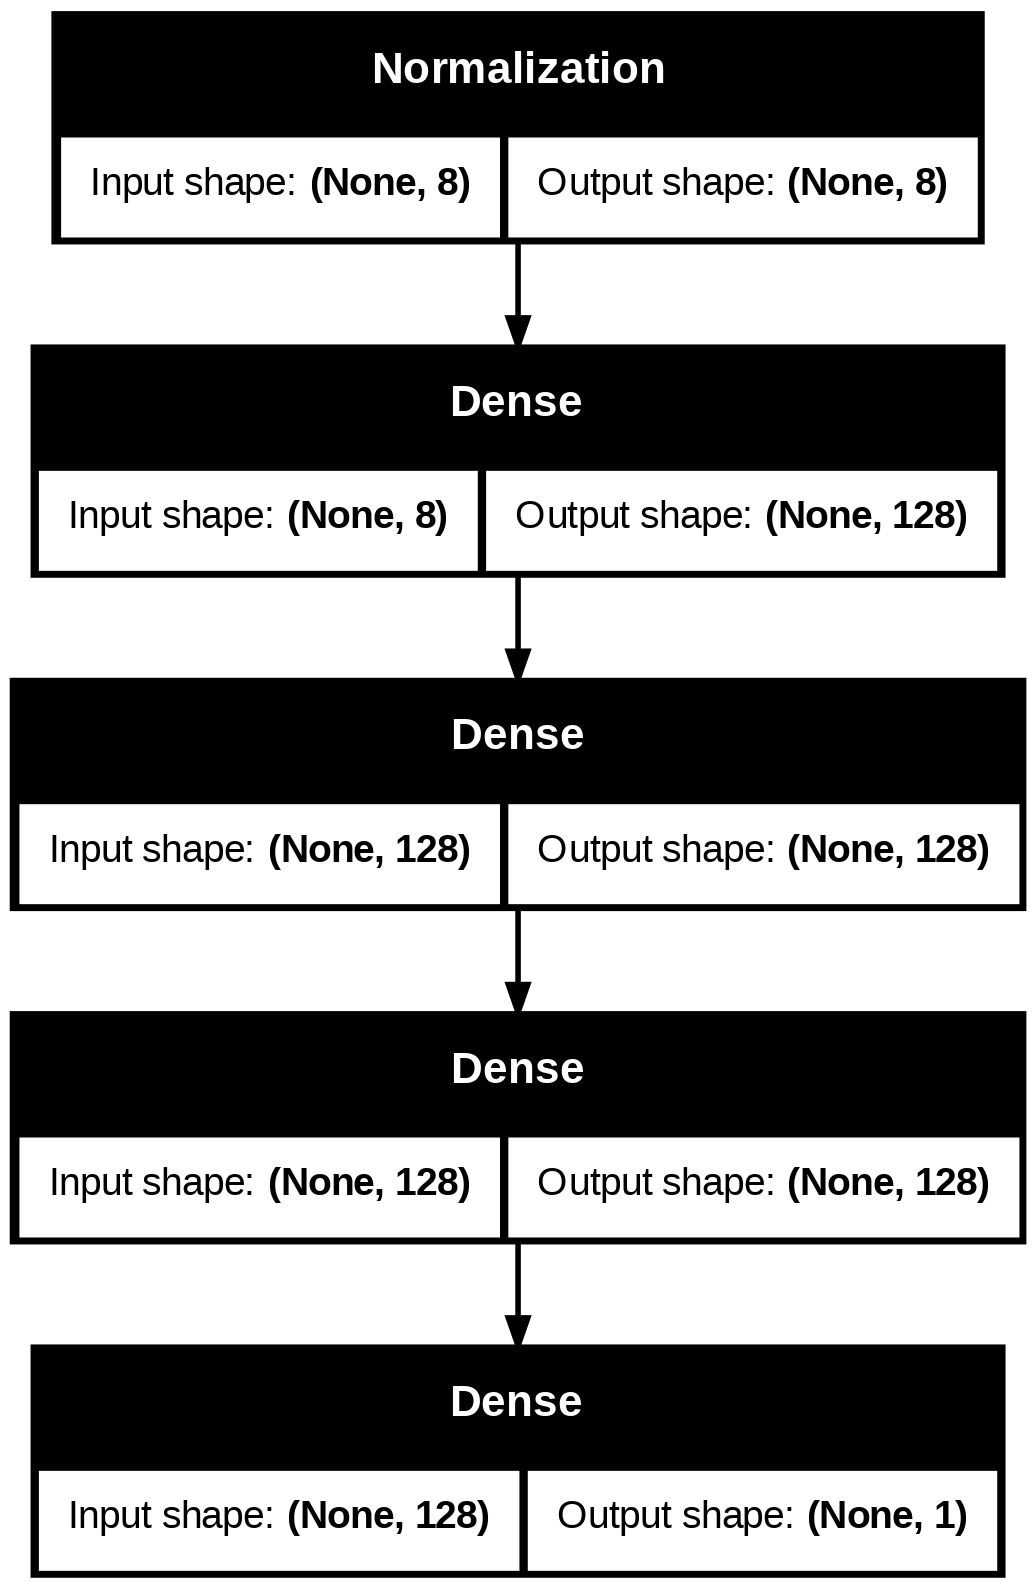

In [159]:
tf.keras.utils.plot_model(modal,to_file="modal.png",show_shapes=True)

In [160]:
modal.compile (optimizer=Adam(learning_rate=0.01),
               loss=MeanAbsoluteError(),
               metrics=[RootMeanSquaredError()])

In [161]:
history=modal.fit(x_train,y_train,validation_data=(x_val,y_val),epochs=100,verbose=1)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 304536.0000 - root_mean_squared_error: 329813.1250 - val_loss: 306947.9688 - val_root_mean_squared_error: 329666.6562
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 279077.2188 - root_mean_squared_error: 307015.0938 - val_loss: 149411.0938 - val_root_mean_squared_error: 181447.0156
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 107136.6641 - root_mean_squared_error: 132157.6406 - val_loss: 55766.2031 - val_root_mean_squared_error: 66843.1641
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 47377.4570 - root_mean_squared_error: 59355.5078 - val_loss: 36825.0156 - val_root_mean_squared_error: 45185.9883
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 38759.3477 - root_mean_squared_error: 48388.6445 - val_loss: 36547.5859 - val_root_mean_squared_error: 43426.6602
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 38473.3320 - root_mean_squared_error: 48215.7422 - val_loss: 35

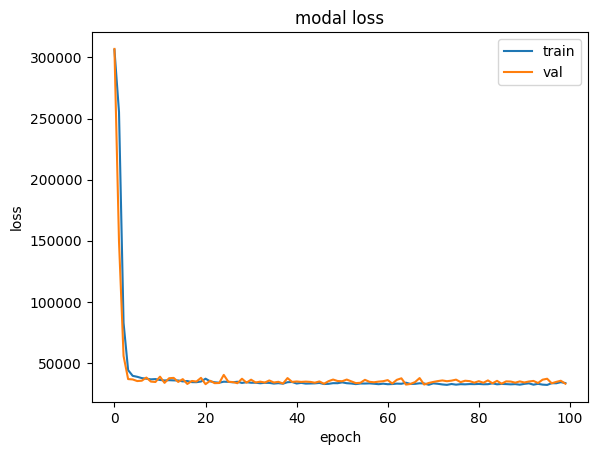

In [162]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title('modal loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

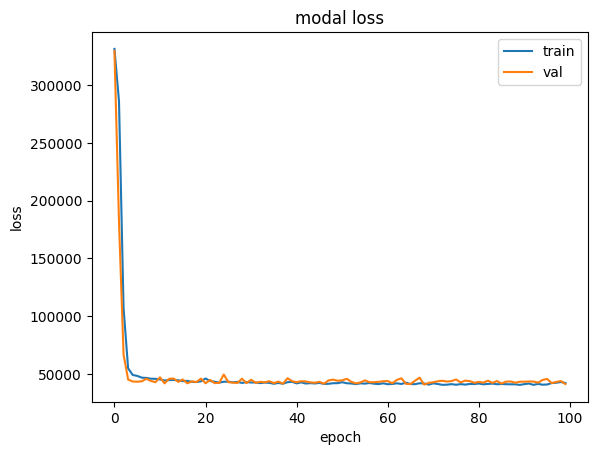

In [163]:
plt.plot(history.history["root_mean_squared_error"])
plt.plot(history.history["val_root_mean_squared_error"])
plt.title('modal loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [164]:
modal.evaluate(x_test,y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 38118.3789 - root_mean_squared_error: 45644.8164


[38821.56640625, 46204.54296875]

In [165]:
x_test.shape

TensorShape([100, 8])

In [166]:
modal.predict(tf.expand_dims(x_test[0],axis=0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


array([[173970.11]], dtype=float32)

In [167]:
y_test[0]

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([201188.5], dtype=float32)>

In [168]:
y_true=list(y_test[:,0].numpy())

In [169]:
y_pred=list(modal.predict(x_test)[:,0])


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


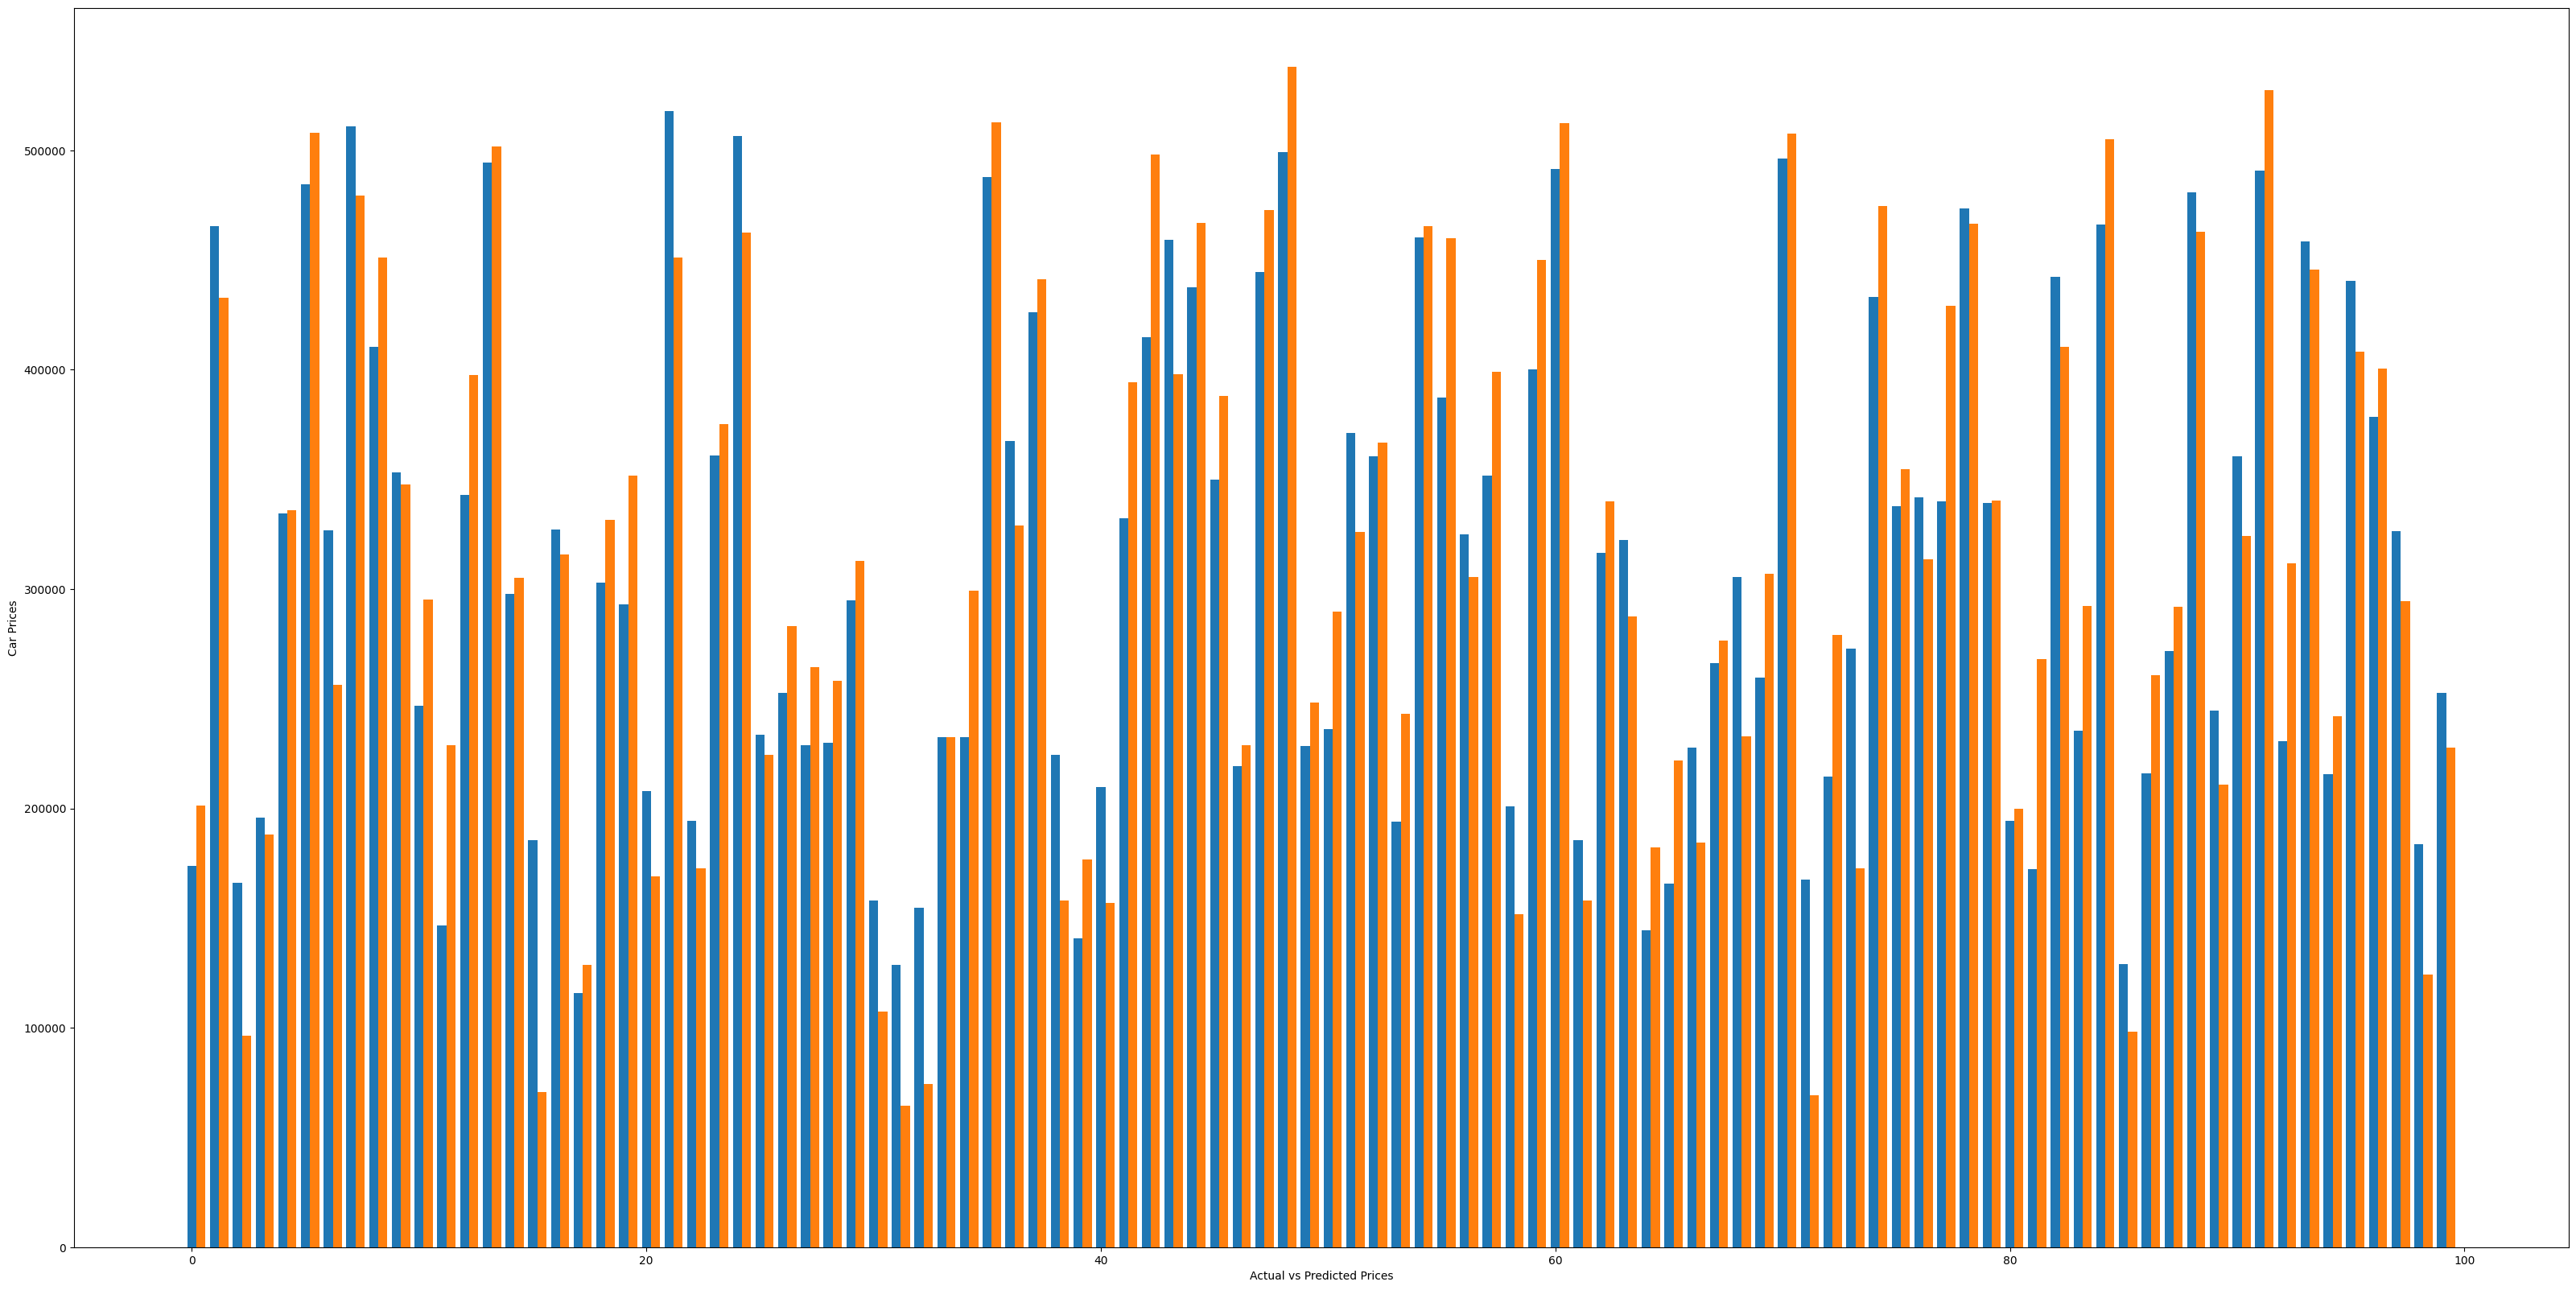

In [170]:
ind =np.arange(100)
plt.figure(figsize=(40,20))

width=0.4

plt.bar(ind,y_pred,width,label='Predicted Car Price')
plt.bar(ind+width,y_true,width,label='Actual Car Price')

plt.xlabel('Actual vs Predicted Prices')
plt.ylabel('Car Prices')

plt.show()